In [ ]:
install.packages('latex2exp')
library(latex2exp)
install.packages('Metrics')
library(Metrics)

In [ ]:
removeDuplicates <- function(data, timeBoundary = 450){

  duplicateVector = c()
  numRow <- length(data$result_time)

  duplicateVector = c(duplicateVector, TRUE)
  startTime <- strptime(data$result_time[1], "%Y-%m-%d %H:%M:%S")

  for (i in 2:numRow){

    nextTime <- strptime(data$result_time[i], "%Y-%m-%d %H:%M:%S")
    timeDifference <- as.numeric(difftime(nextTime, startTime, units = c("secs")))

    if (timeDifference > timeBoundary){
      duplicateVector = c(duplicateVector, TRUE)
      startTime <- strptime(data$result_time[i], "%Y-%m-%d %H:%M:%S")
    }
    else{
      duplicateVector = c(duplicateVector, FALSE)
    }
  }
  return(data[duplicateVector,])
}

In [ ]:
mergeDF <- function(listofdf){
  comboDf <- Reduce(function(x, y) merge(x, y, sort = TRUE, all = TRUE), listofdf)
  return(comboDf)
}

In [ ]:
aggregateOverTime <- function(variable, timePeriod, data)
{
  LEN <- length(data$result_time)

  # initialize variables
  v <- c()
  currentCount <- 0
  numIteration <- 0

  # set time for begining of first period
  periodStart <- strptime("2010-05-29 07:00:00", "%Y-%m-%d %H:%M:%S")

  # iterate through each row of the dataframe
  for (i in 1:LEN)
  {
    # calculate the difference in time between the beginning of the period and the current row
    currentTime <- data$result_time[i]
    timeDifference <- as.numeric(difftime(currentTime, periodStart, units = c("secs")))

    # if the time difference is less then the period
    if (timeDifference <= timePeriod)
    {
      # increment the variables
      currentCount <- currentCount + data[[variable]][i]
      numIteration <- numIteration + 1
    }
    # if the time difference is greater then the period
    else
    {
      # append the average value of the variable being tracked to a vector
      v <- c(v, currentCount / numIteration)
      
      # calculate how many periods were skipped and when the next period begins
      sinceStart <- as.numeric(difftime(currentTime, periodStart, units = c("sec")))
      periodsSkipped <- floor(sinceStart / timePeriod)
      periodTemp <- periodStart + (periodsSkipped * timePeriod)

      # append a zero to the vector for each period skipped 
      if(periodsSkipped - 1 > 0)
      {
        temp <- rep(c(0), times = periodsSkipped - 1)
        v <- c(v, temp)
      }
      
      # redefine periodStart as the beginning of the new period
      periodStart <- periodTemp

      # initialize variables for new period
      currentCount <- data[[variable]][i]
      numIteration <- 1
    }
  }
  return(v)
}

In [ ]:
# Calculate soil water potential from raw (mv) to kilo Pascals (kPa)

calcSwp <- function(rawWP)
{
  a = 0.000048
  b = 0.0846
  c = 39.45

  if(rawWP < 591 || rawWP > 841)
  {
    calWP = 0
  }
  else
  {
    calWP = -1.0 * exp((a * rawWP * rawWP) - (b * rawWP) + c)
  }
  return(calWP)
}

In [ ]:
# Calculate soil moisture from raw (mV) to volumetric (m^3/m^3)

calcVwc <- function(rawSM)
{
  a = 0.00119
  b = 0.401

  if (rawSM < 337 || rawSM > 841)
  {
      calSM = 0
  }
  else
  {
      calSM = a * rawSM - b
  }
  return(calSM)
}

In [ ]:
createDataTable <- function(time, data)
{
  adc0 <- aggregateOverTime(variable = 'adc0', timePeriod = time, data = data)
  adc0Converted <- vapply(X = adc0, FUN = calcSwp, FUN.VALUE = numeric(1))

  adc1 <- aggregateOverTime(variable = 'adc1', timePeriod = time, data = data)
  adc1Converted <- vapply(X = adc1, FUN = calcVwc, FUN.VALUE = numeric(1))

  adc2 <- aggregateOverTime(variable = 'adc2', timePeriod = time, data = data)
  adc2Converted <- vapply(X = adc2, FUN = calcVwc, FUN.VALUE = numeric(1))

  return(data.frame(adc0 = adc0Converted, adc1 = adc1Converted, adc2 = adc2Converted))
}

In [ ]:
data2003 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2003.txt")
data2015 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2015.txt")
data2025 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2025.txt")
data2045 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2045.txt")
data2055 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2055.txt")
data2065 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2065.txt")
data2085 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2085.txt")
data2095 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2095.txt")
data2103 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2103.txt")
data2115 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2115.txt")
data2125 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2125.txt")
data2135 <- read.csv("https://raw.githubusercontent.com/ds-wm/ds-wm.github.io/master/course/atsa/data/MDA300BKUP_resultsConverted-2YR_2135.txt")

In [ ]:
dataList <- list(data2003, 
                 data2015,
                 data2025,
                 data2045,
                 data2055,
                 data2065,
                 data2085,
                 data2095,
                 data2103,
                 data2115,
                 data2125,
                 data2135)

In [ ]:
dpFree2003 <- removeDuplicates(data2003)
dpFree2015 <- removeDuplicates(data2015)
dpFree2025 <- removeDuplicates(data2025)
dpFree2045 <- removeDuplicates(data2045)
dpFree2055 <- removeDuplicates(data2055)
dpFree2065 <- removeDuplicates(data2065)
dpFree2085 <- removeDuplicates(data2085)
dpFree2095 <- removeDuplicates(data2095)
dpFree2103 <- removeDuplicates(data2103)
dpFree2115 <- removeDuplicates(data2115)
dpFree2125 <- removeDuplicates(data2125)
dpFree2135 <- removeDuplicates(data2135)

In [ ]:
dpFreeList <- list(dpFree2003, 
                   dpFree2015,
                   dpFree2025,
                   dpFree2045,
                   dpFree2055,
                   dpFree2065,
                   dpFree2085,
                   dpFree2095,
                   dpFree2103,
                   dpFree2115,
                   dpFree2125,
                   dpFree2135) 

In [ ]:
origAgg <- mergeDF(dataList)
origAgg$result_time <- strptime(origAgg$result_time, "%Y-%m-%d %H:%M:%S")

dpFreeAgg <- mergeDF(dpFreeList)
dpFreeAgg$result_time <- strptime(dpFreeAgg$result_time, "%Y-%m-%d %H:%M:%S")

In [ ]:
# FYI: THIS BLOCK OF CODE TAKES A LONG TIME TO RUN

# origional data

origMin15 <- createDataTable(15*60, origAgg)
origMin60 <- createDataTable(60*60, origAgg)
origHour12 <- createDataTable(12*60*60, origAgg)
origHour24 <- createDataTable(24*60*60, origAgg)

# duplicate free data

dpFreeMin15 <- createDataTable(15*60, dpFreeAgg)
dpFreeMin60 <- createDataTable(60*60, dpFreeAgg)
dpFreeHour12 <- createDataTable(12*60*60, dpFreeAgg)
dpFreeHour24 <- createDataTable(24*60*60, dpFreeAgg)

In [ ]:
createPlots <- function(origionalData, duplicateFreeData, variable, lim, xlab, ylab)
{
  par(mfrow = c(2,2))
  options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 150)
  mainList <- list('15 Minute Interval', "60 Minute Interval", "12 Hour Interval", "24 Hour Interval")

  for (i in 1:4)
  {
  x = data.frame(duplicateFreeData[i])[[variable]]
  y = data.frame(origionalData[i])[[variable]]
  plot(x, y, xlab = xlab, ylab = ylab, main = mainList[i], xlim = lim, ylim = lim)

  rT <- round(summary(lm(x ~ y))$r.squared, 4)
  rmseT <- rmse(y, x)

  width <- lim[2] - lim[1]
  ma <- max(lim)
  mi <- min(lim)

  text(ma - width*.30, mi + width*.18, sprintf('N = %d', length(x)), cex = 1.2, adj = c(0, 0))
  text(ma - width*.30, mi + width*.10, TeX('$R^2 =$'), cex = 1.2, adj = c(0, 0))
  text(ma - width*.20, mi + width*.10, rT, cex = 1.2, adj = c(0, 0))
  text(ma - width*.30, mi + width*.02, sprintf('RMSE = %.2f', rmseT), cex = 1.2, adj = c(0, 0))
  }
}

In [ ]:
x <- list(origMin15, origMin60, origHour12, origHour24)
y <- list(dpFreeMin15, dpFreeMin60, dpFreeHour12, dpFreeHour24)

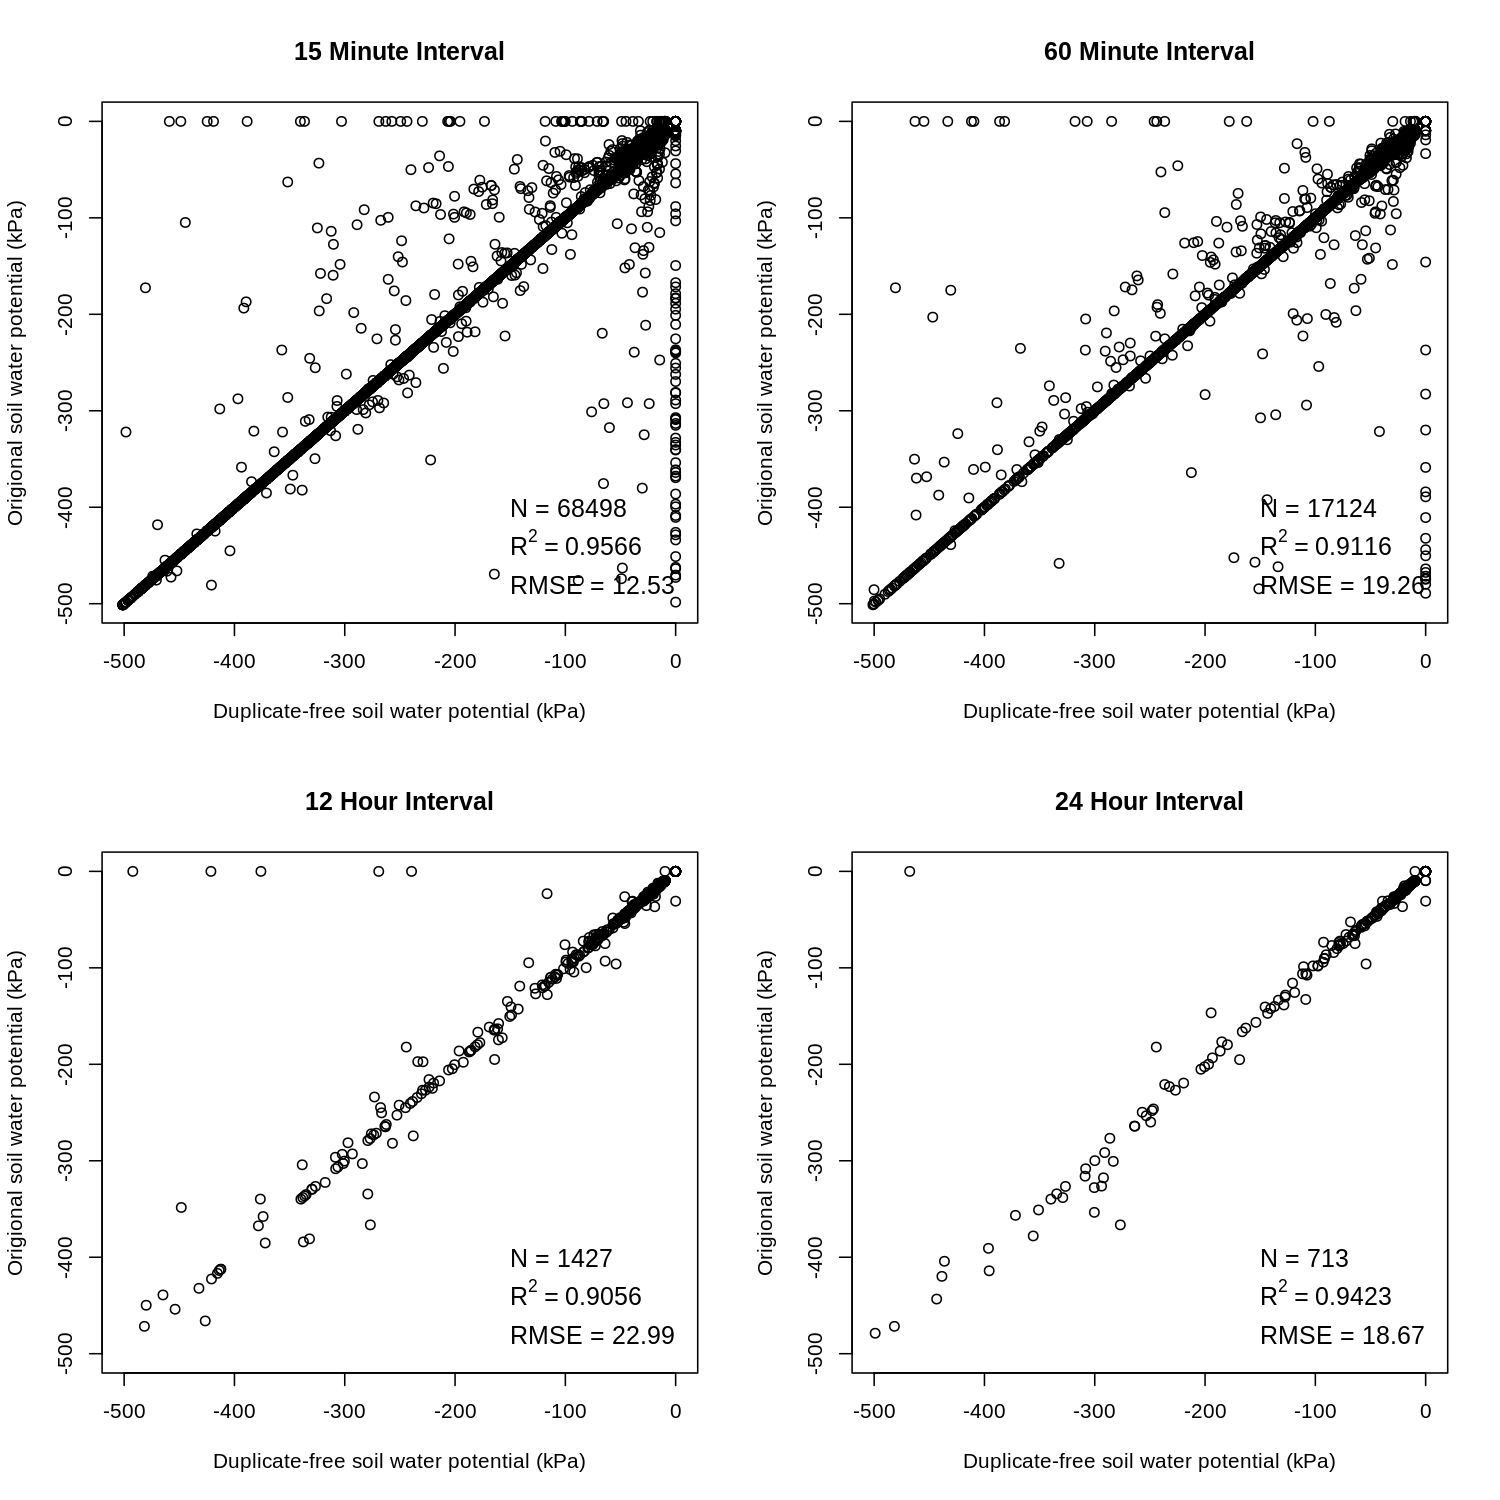

In [ ]:
createPlots(x, y, variable = 'adc0', lim = c(-500, 0), xlab = 'Duplicate-free soil water potential (kPa)', 
                                                       ylab = "Origional soil water potential (kPa)")

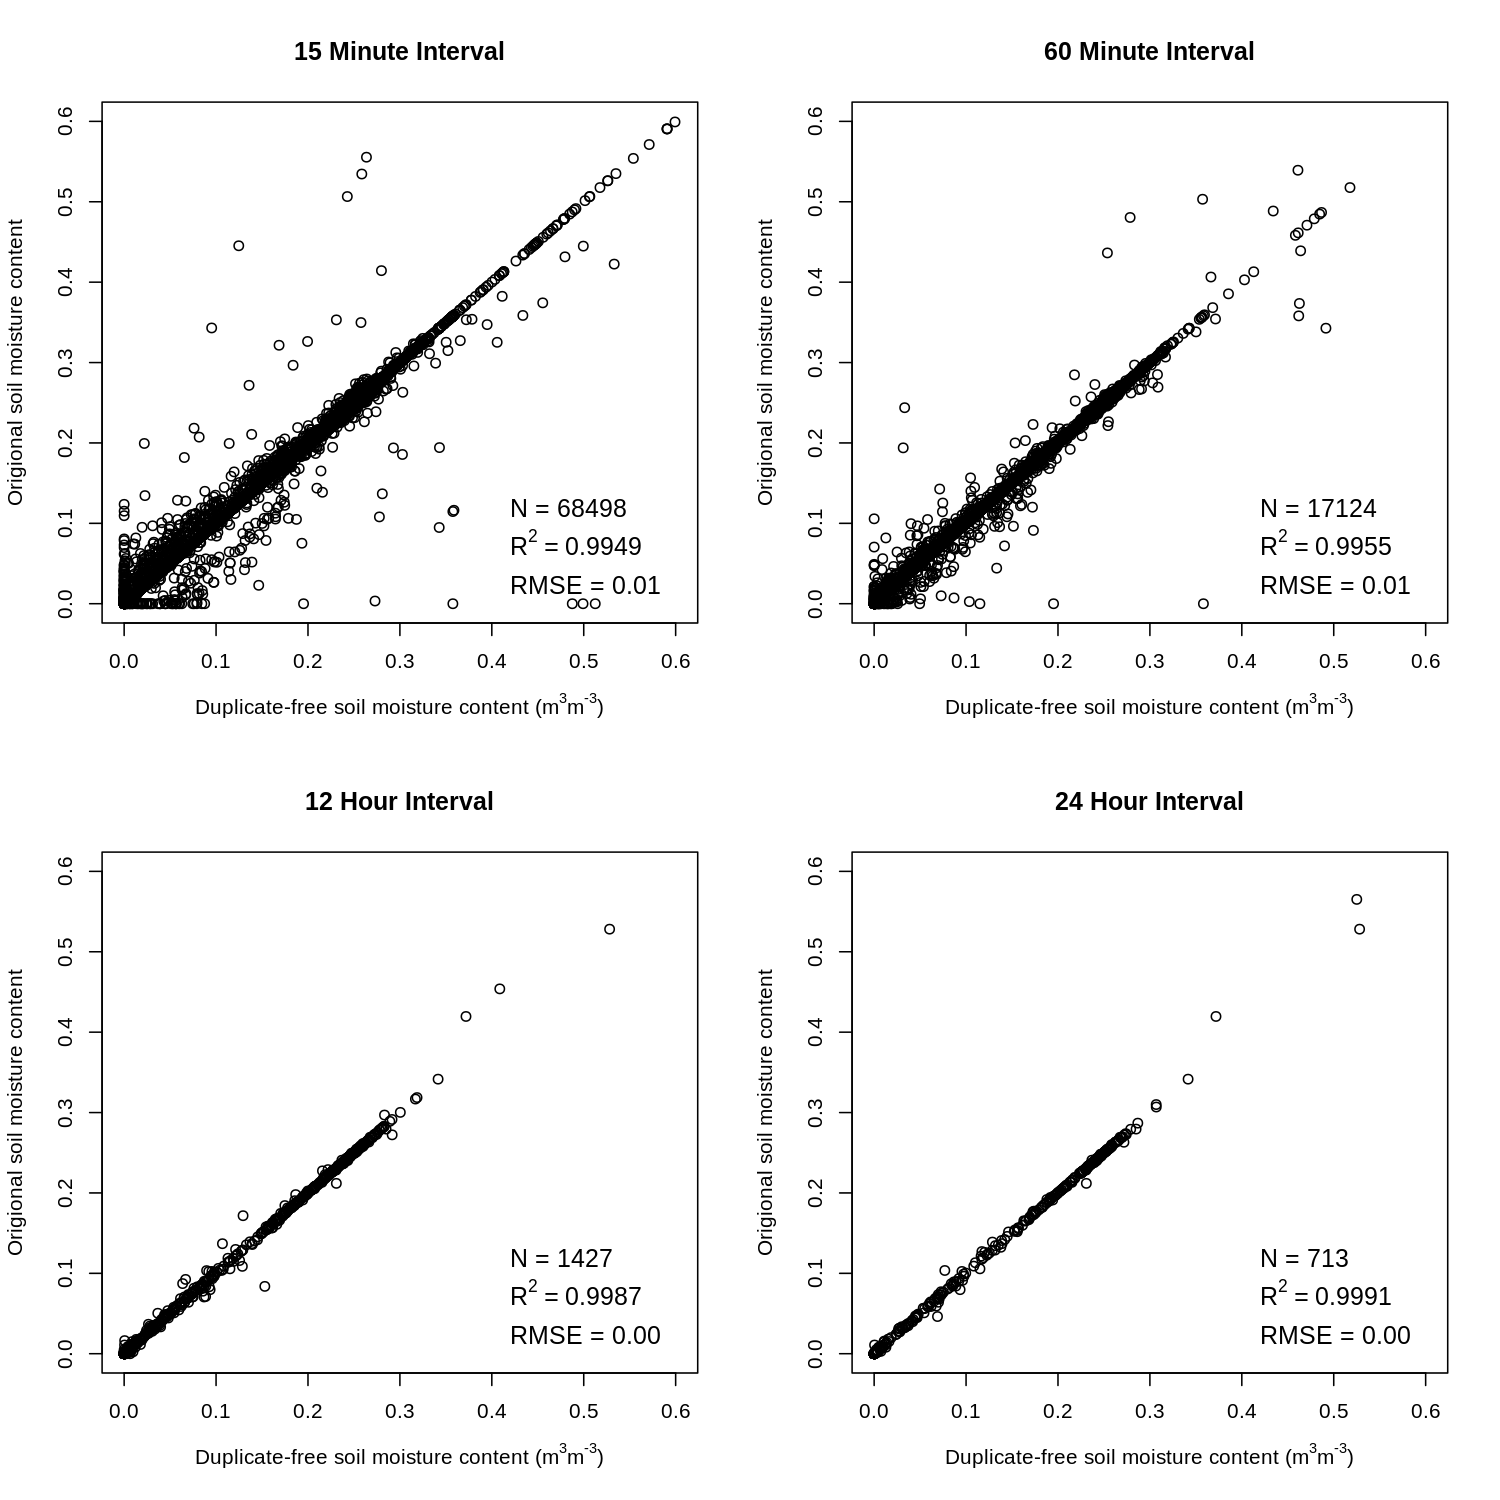

In [ ]:
createPlots(x, y, variable = 'adc1', lim = c(0, 0.6), xlab = TeX('Duplicate-free soil moisture content ($m^3 m^{-3}$)'), 
                                                      ylab = "Origional soil moisture content")

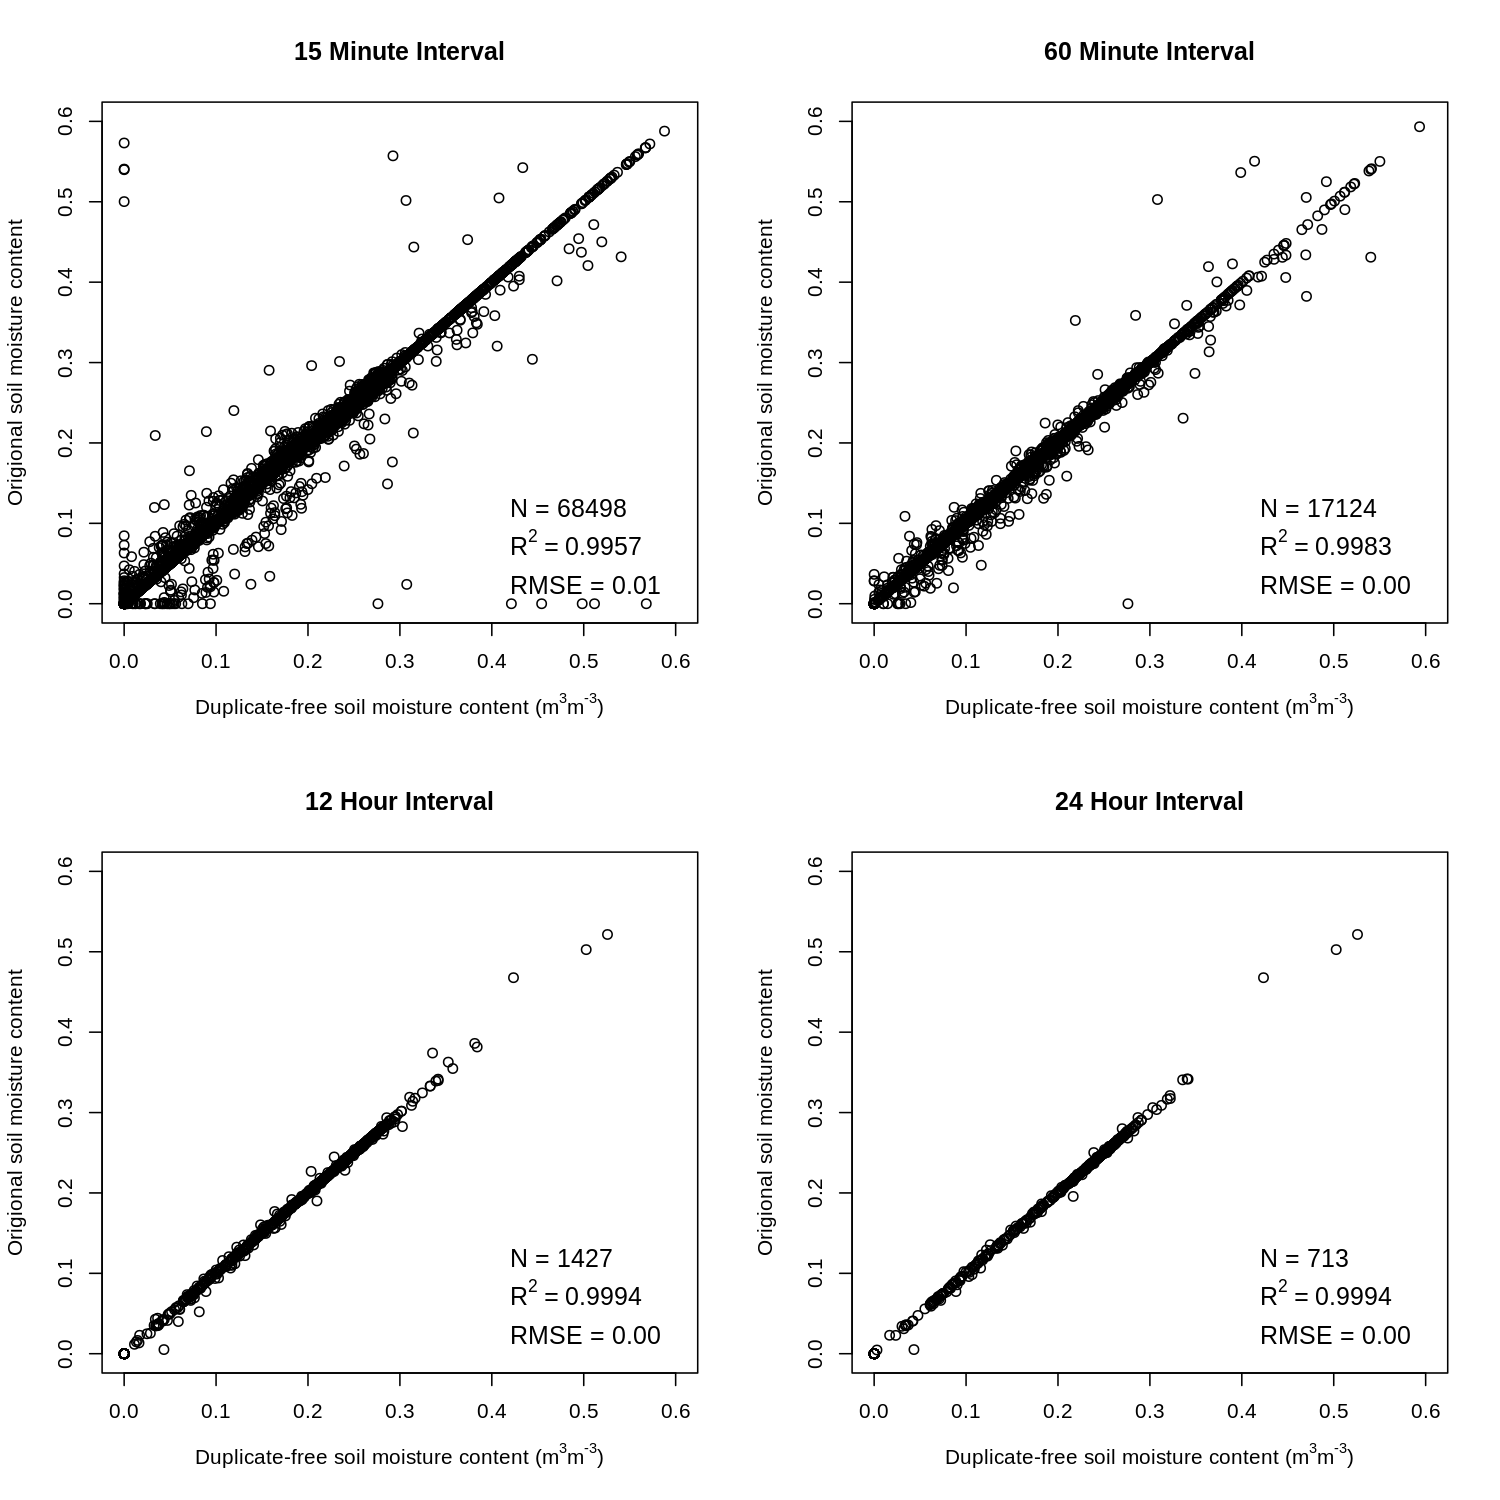

In [ ]:
createPlots(x, y, variable = 'adc2', lim = c(0, .6), xlab = TeX('Duplicate-free soil moisture content ($m^3 m^{-3}$)'), 
                                                     ylab = "Origional soil moisture content")